In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

***Load Dataset***

In [ ]:
import pandas as pd
path=('/content/online_fraud.csv')
data=pd.read_csv(path)

***EDA(Exploratory Data Analysis)***

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,39.0,TRANSFER,574748.85,C2141567696,106088.00,0.00,C883779624,0.00,574748.85,0.0
1,43.0,CASH_IN,21118.84,C696392496,10500000.00,10500000.00,C1021427324,2689219.94,2668101.10,0.0
2,43.0,CASH_IN,26551.78,C243566485,20562.93,47114.71,C1585728667,0.00,0.00,1.0
3,39.0,PAYMENT,7819.09,C662848077,0.00,0.00,M1063211872,0.00,0.00,0.0
4,36.0,CASH_OUT,312914.21,C2100965538,0.00,0.00,C1140936910,1310916.68,1623830.88,0.0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1995,19.0,CASH_OUT,201747.97,C834638061,30867.00,0.00,C1942330558,0.00,201747.97,0.0
1996,43.0,CASH_OUT,71824.13,C28062333,0.00,0.00,C2018730515,1070431.82,1527640.34,0.0
1997,18.0,CASH_OUT,170296.78,C1591293776,0.00,0.00,C1623027152,294815.69,462769.57,0.0
1998,9.0,PAYMENT,8656.30,C666707025,1934606.66,1925950.37,M406462872,0.00,0.00,0.0
1999,43.0,PAYMENT,16355.95,C1041343233,463.00,0.00,M1812863235,0.00,0.00,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1900 non-null   float64
 1   type            2000 non-null   object 
 2   amount          1900 non-null   float64
 3   nameOrig        2000 non-null   object 
 4   oldbalanceOrg   1900 non-null   float64
 5   newbalanceOrig  1900 non-null   float64
 6   nameDest        2000 non-null   object 
 7   oldbalanceDest  1900 non-null   float64
 8   newbalanceDest  1900 non-null   float64
 9   isFraud         1904 non-null   float64
dtypes: float64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1900.000000,1.900000e+03,1.900000e+03,1.900000e+03,1.900000e+03,1.900000e+03,1904.000000
mean,26.754737,1.560276e+05,8.748482e+05,8.962796e+05,9.621506e+05,1.109567e+06,0.255777
std,15.640641,2.666007e+05,2.939657e+06,2.974013e+06,2.257951e+06,2.409283e+06,0.498256
min,2.000000,2.157000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,14.000000,1.195274e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,20.000000,7.317258e+04,1.643600e+04,0.000000e+00,9.804320e+04,1.944327e+05,0.000000
75%,39.000000,2.102646e+05,1.515818e+05,1.935373e+05,8.132526e+05,1.074115e+06,1.000000
max,95.000000,3.875566e+06,2.970000e+07,2.990000e+07,2.930000e+07,2.990000e+07,11.000000


In [ ]:
print("\nDataset shape (rows, columns):")
print(data.shape)


Dataset shape (rows, columns):
(2000, 10)


In [ ]:
print("\nColumn names:")
print(data.columns)


Column names:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')


In [ ]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
step              100
type                0
amount            100
nameOrig            0
oldbalanceOrg     100
newbalanceOrig    100
nameDest            0
oldbalanceDest    100
newbalanceDest    100
isFraud            96
dtype: int64


In [ ]:
print("\nSummary statistics for categorical columns:")
print(data.describe(include=[object]))


Summary statistics for categorical columns:
            type     nameOrig    nameDest
count       2000         2000        2000
unique         5         2000        1986
top     CASH_OUT  C2141567696  C771362675
freq         708            1           2


In [ ]:
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Number of duplicate rows:
0


***Data Visualization***

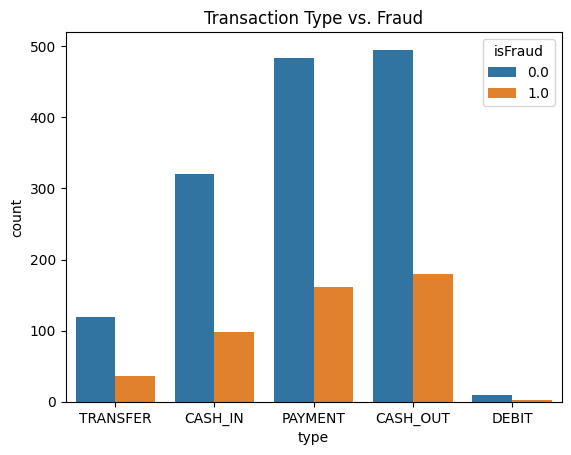

In [ ]:
#Transaction Type vs. Fraud
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data, x='type', hue='isFraud')
plt.title('Transaction Type vs. Fraud')
plt.show()

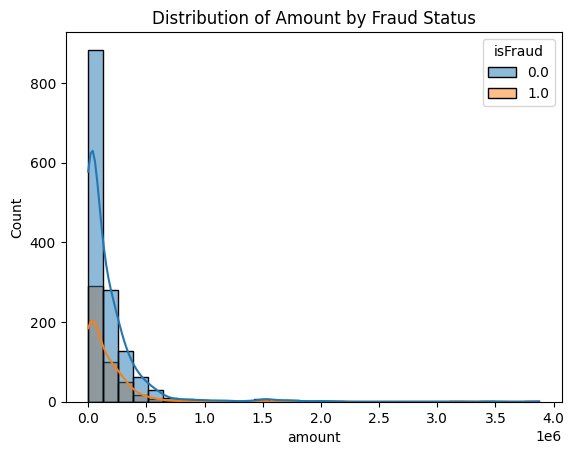

In [ ]:
#Distribution of Amount for Fraudulent vs Non-Fraudulent Transactions:
sns.histplot(data=data, x='amount', hue='isFraud', kde=True, bins=30)
plt.title('Distribution of Amount by Fraud Status')
plt.show()

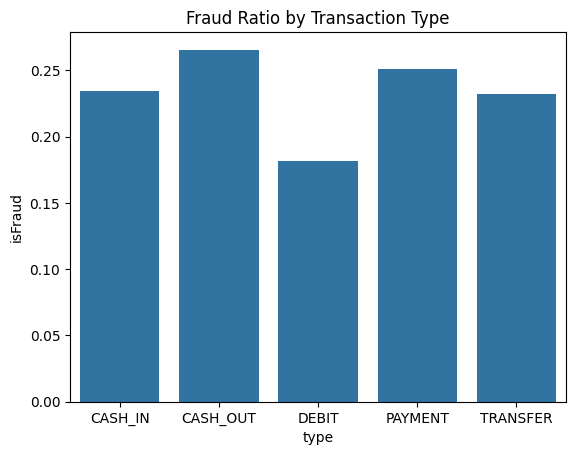

In [ ]:
#Fraud Ratio Across Different Types:
fraud_ratio = data.groupby('type')['isFraud'].mean().reset_index()
sns.barplot(data=fraud_ratio, x='type', y='isFraud')
plt.title('Fraud Ratio by Transaction Type')
plt.show()

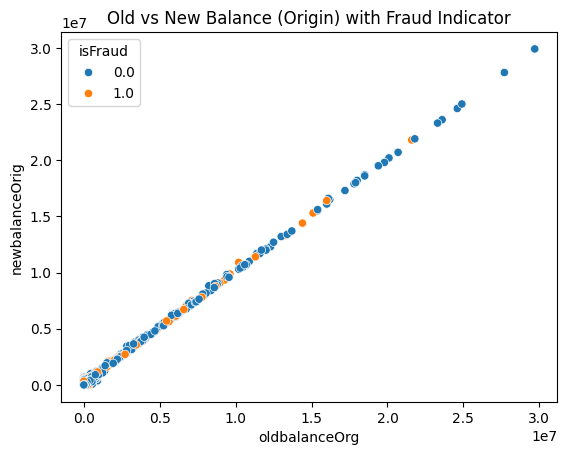

In [ ]:
#Scatter Plot of Balances:
sns.scatterplot(data=data, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud')
plt.title('Old vs New Balance (Origin) with Fraud Indicator')
plt.show()

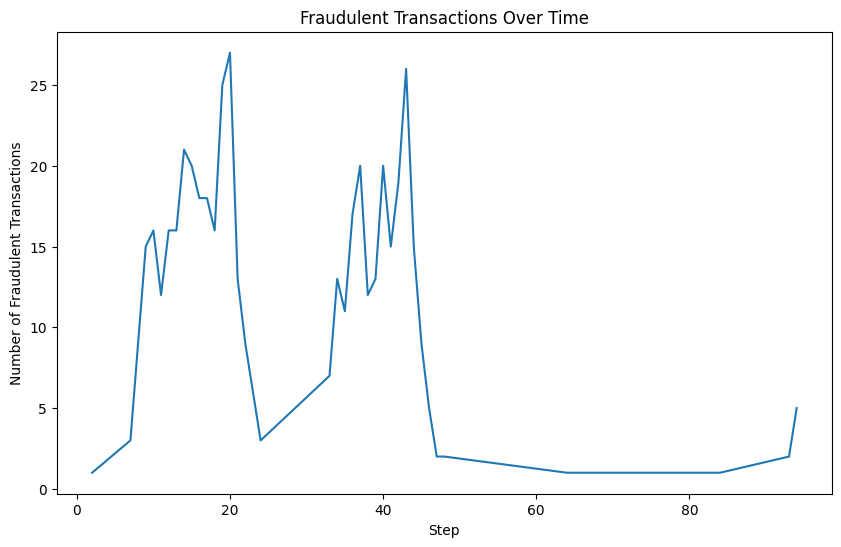

In [ ]:
fraud_over_time = data[data['isFraud'] == 1].groupby('step').size()
fraud_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

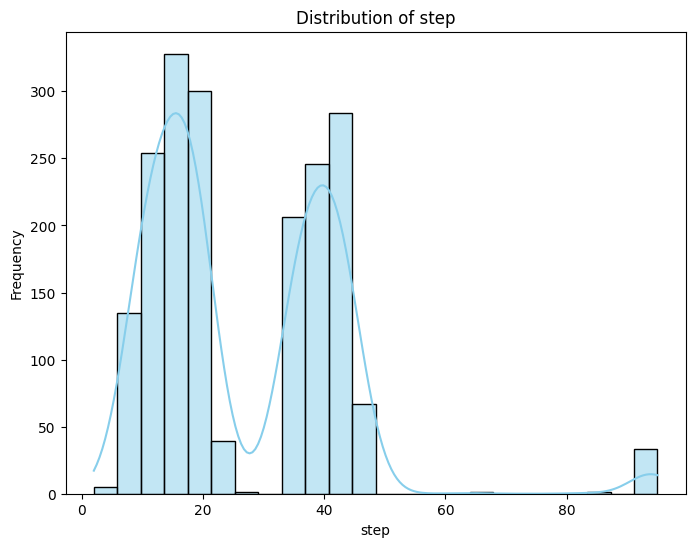

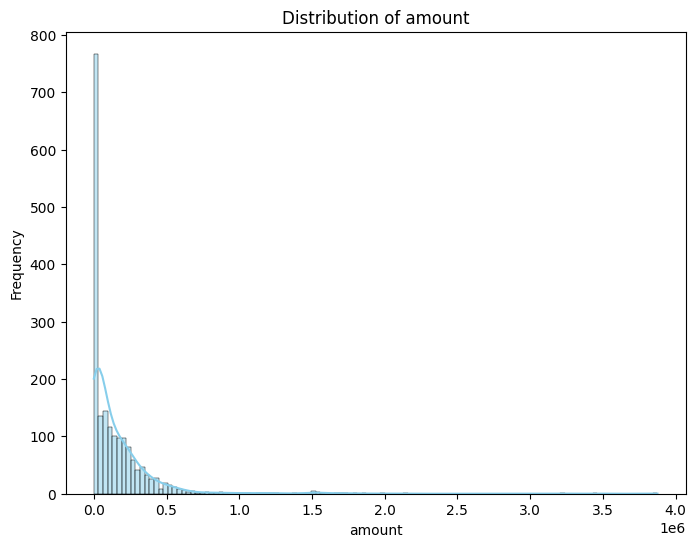

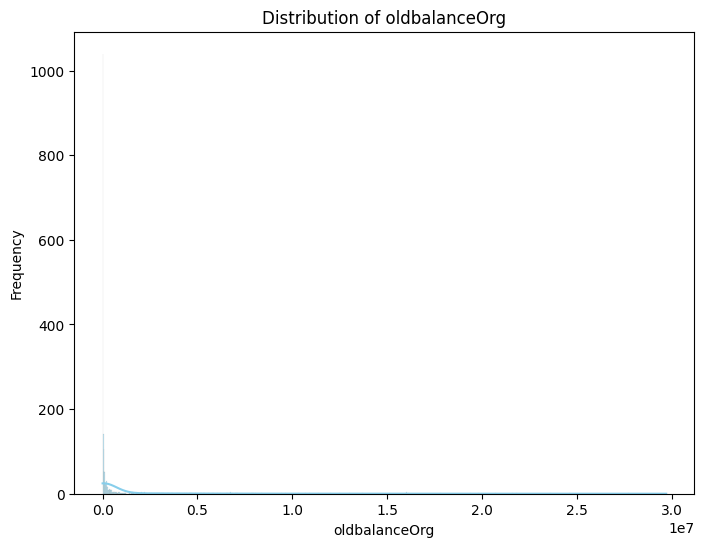

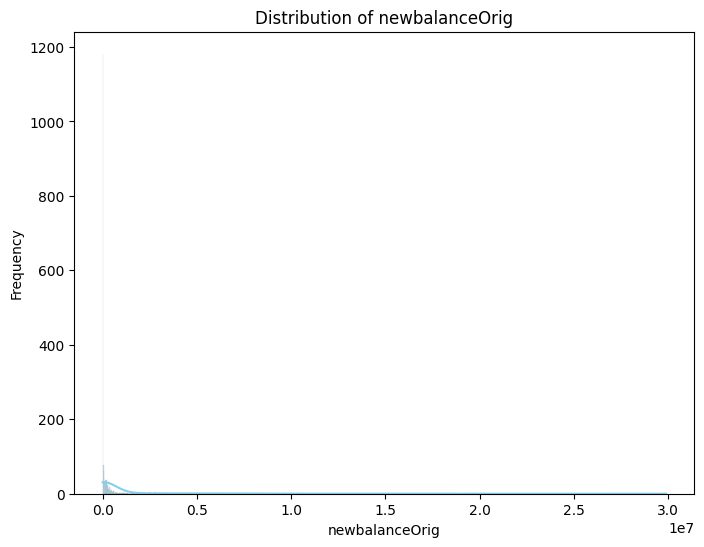

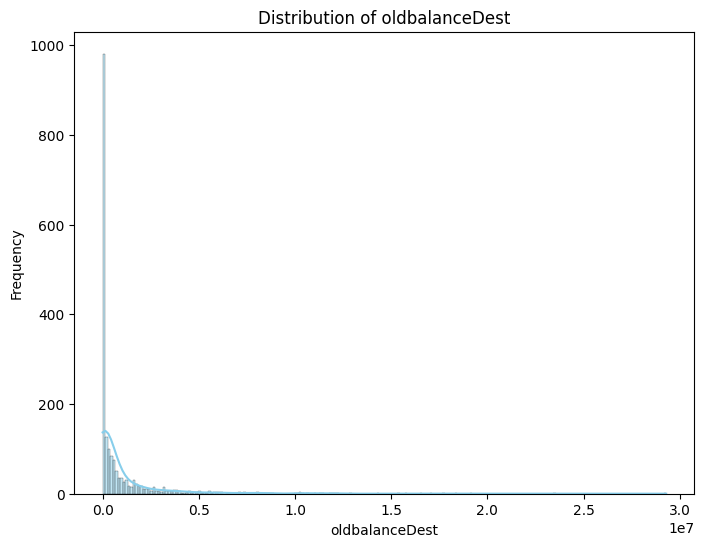

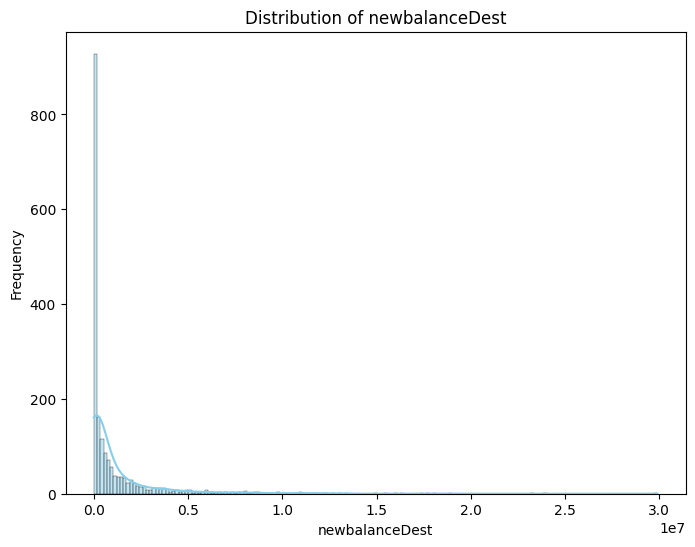

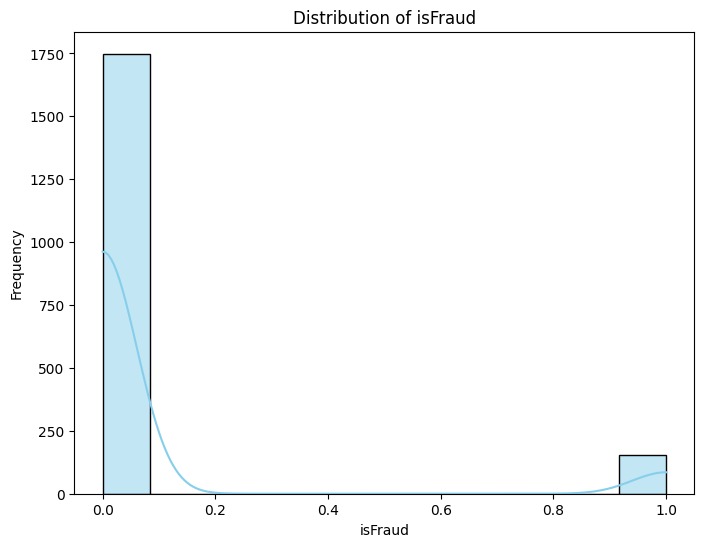

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


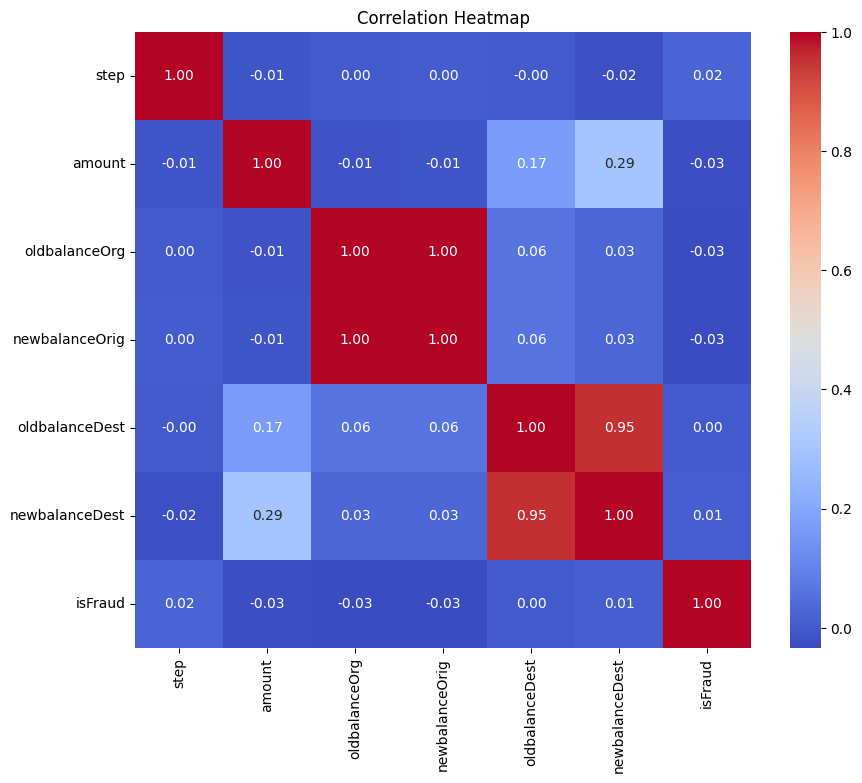

In [ ]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
    plt.title("Correlation Heatmap")
    plt.show()

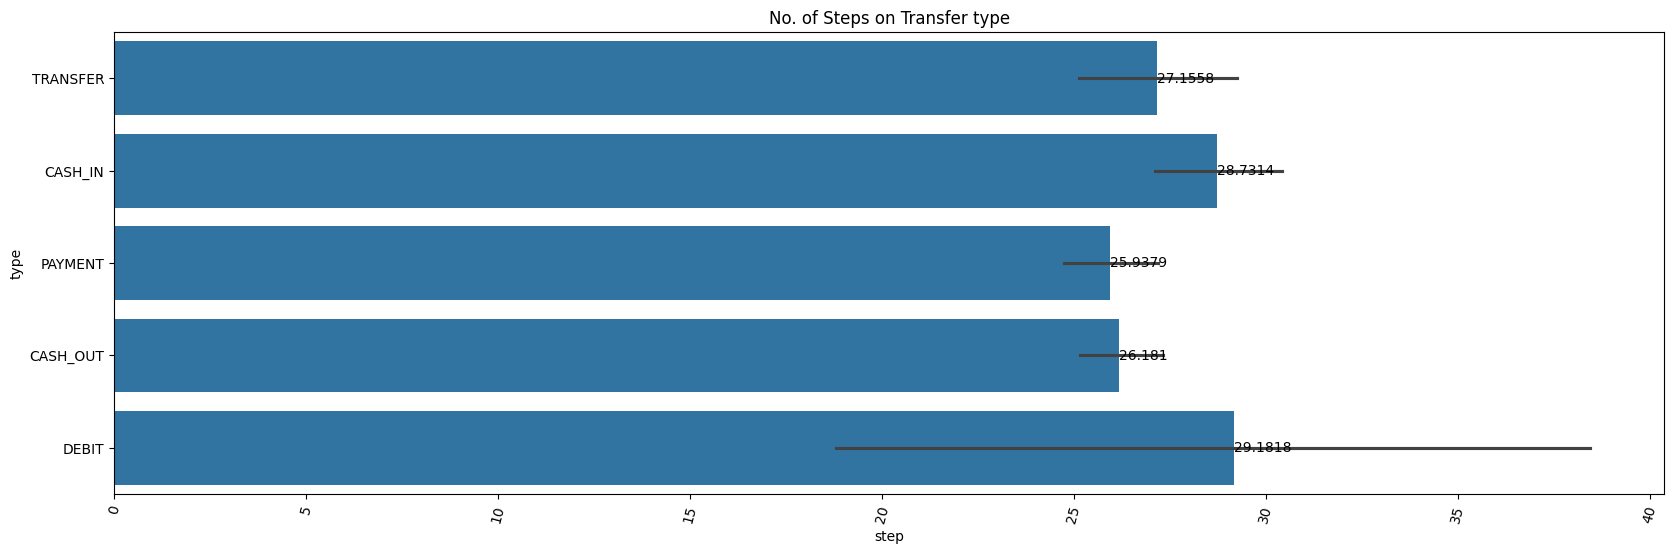

In [ ]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data = data, x = "step",  y= "type")
plt.xticks(rotation = 75)
plt.title("No. of Steps on Transfer type")
plt.xlabel("step")
plt.ylabel("type")
plt.bar_label(figure1.containers[0])
plt.show()

<ipython-input-24-e0cbd82816c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['amount'].dropna(), kde=True, color='skyblue')


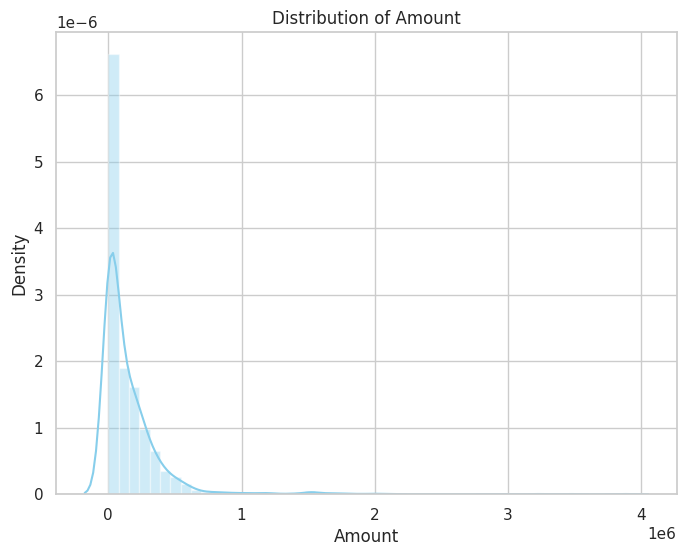

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(data['amount'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

<ipython-input-26-0212bbde5e2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='type', y='amount', palette='coolwarm')


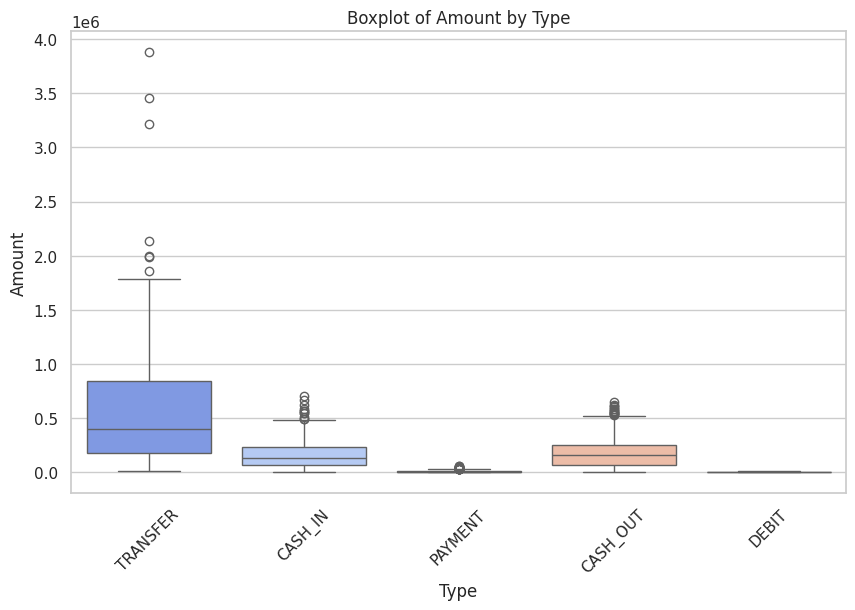

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='type', y='amount', palette='coolwarm')
plt.title('Boxplot of Amount by Type')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

<ipython-input-38-5fa2f74be71b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='oldbalanceOrg', y='newbalanceOrig', palette="pastel")


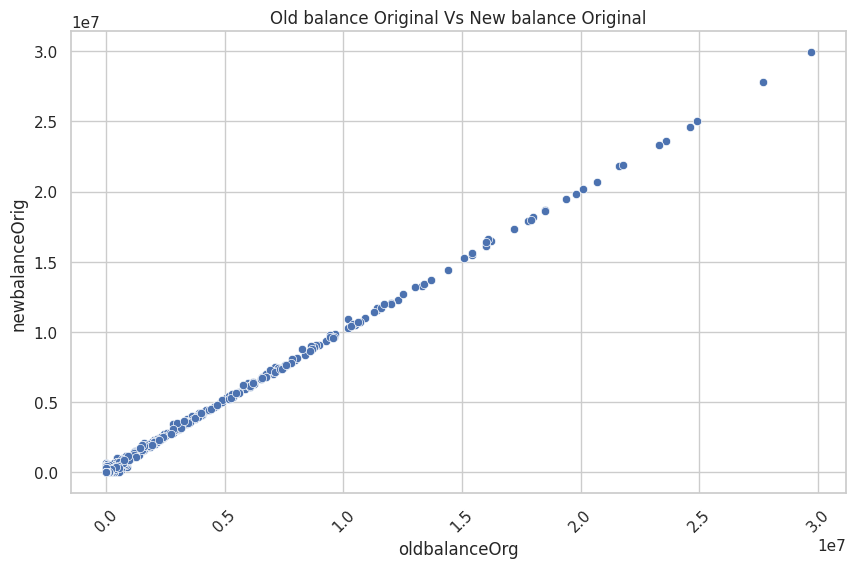

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='oldbalanceOrg', y='newbalanceOrig', palette="blue")
plt.title('Old balance((Origin) Vs New balance (Origin)')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.xticks(rotation=45)
plt.show()

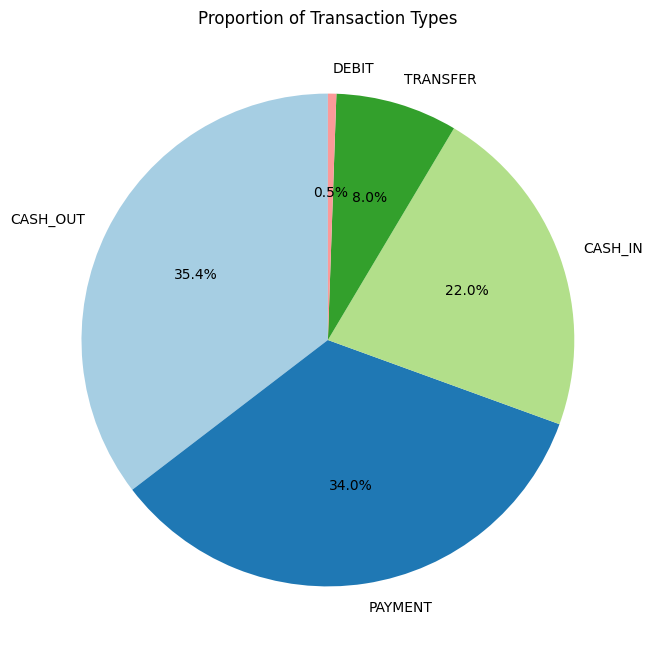

In [ ]:
category_counts = data['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Transaction Types')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

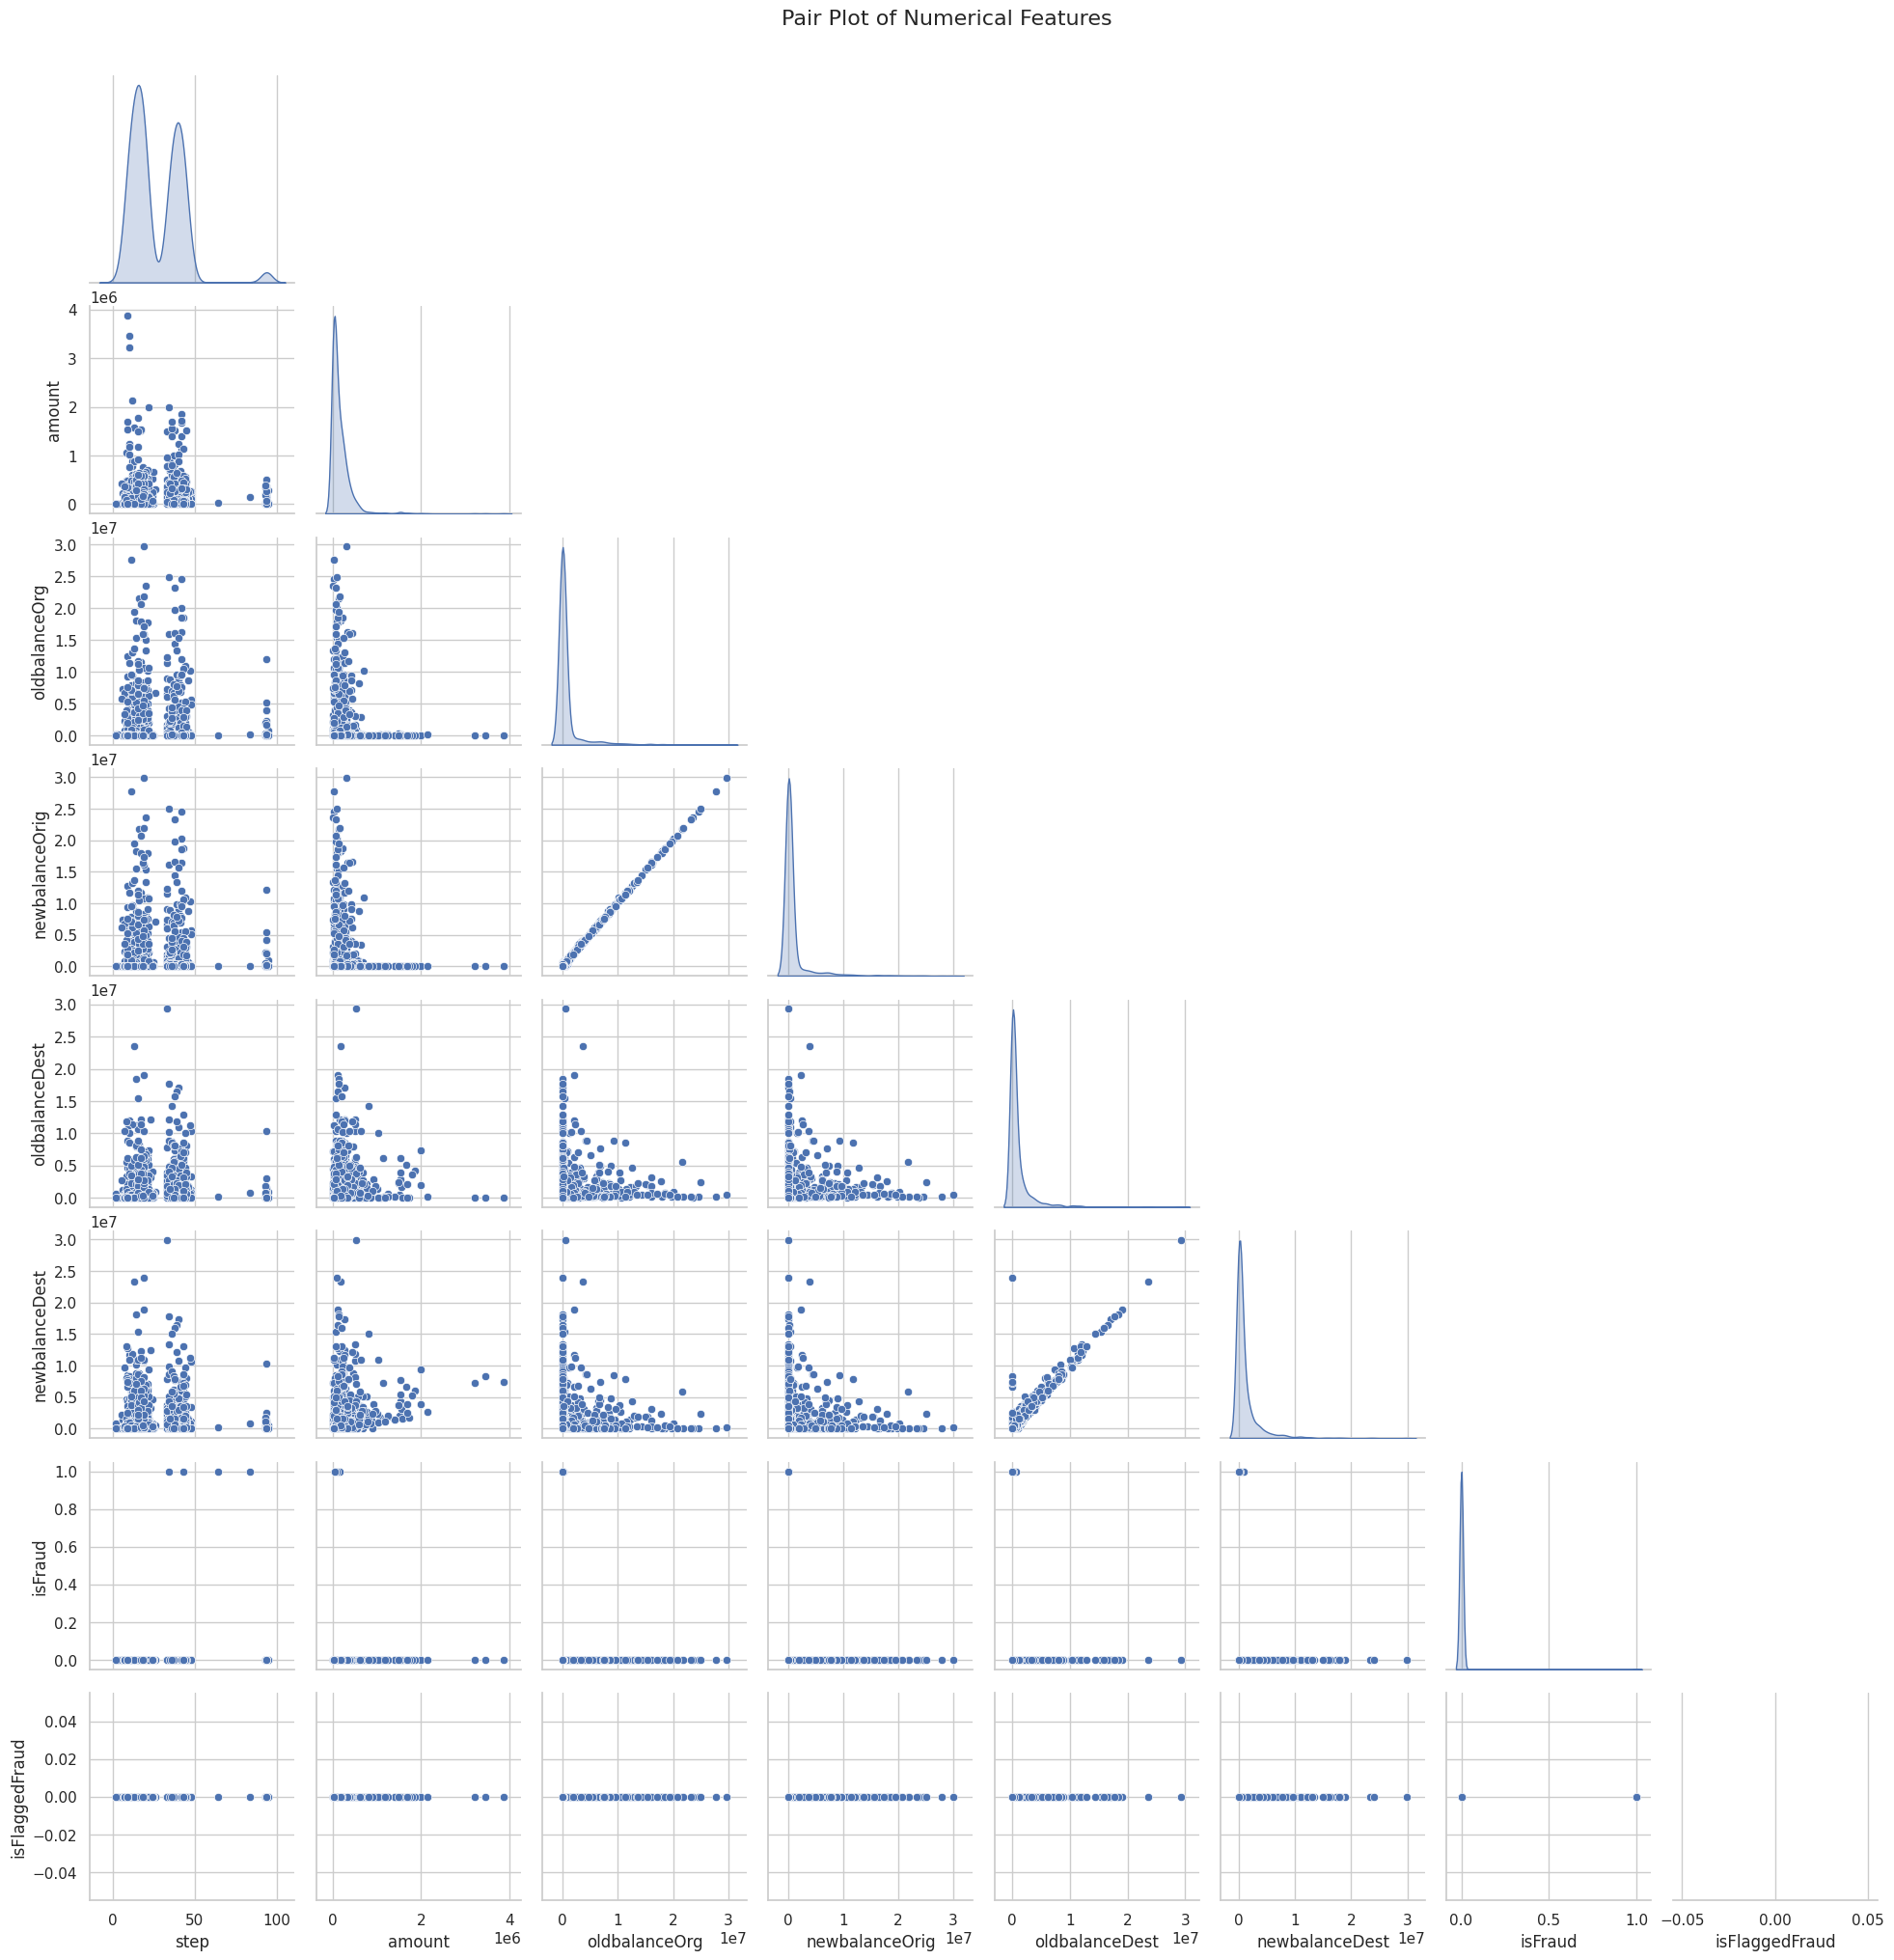

In [ ]:
sns.pairplot(data.select_dtypes(include=['number']), diag_kind='kde', corner=True, palette='bright')
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.show()

***Data Cleaning***

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())




Missing values in each column:
step              100
type                0
amount            100
nameOrig            0
oldbalanceOrg     100
newbalanceOrig    100
nameDest            0
oldbalanceDest    100
newbalanceDest    100
isFraud            96
dtype: int64


In [ ]:
# Fill missing values
data['oldbalanceOrg'] = data['oldbalanceOrg'].fillna(data['oldbalanceOrg'].mean())  # Example for numeric column
data['type'] = data['type'].fillna(data['type'].mode()[0])  # Example for categorical column

In [ ]:
# Check for duplicates
print("\nNumber of duplicate rows:", data.duplicated().sum())
# Drop duplicates
data = data.drop_duplicates()



Number of duplicate rows: 0


In [ ]:
# Example for one numeric column (oldbalanceOrg)
Q1 = data['oldbalanceOrg'].quantile(0.25)
Q3 = data['oldbalanceOrg'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['oldbalanceOrg'] >= lower_bound) & (data['oldbalanceOrg'] <= upper_bound)]

In [ ]:
# Convert text columns to lowercase and strip spaces
data['type'] = data['type'].str.lower().str.strip()

In [ ]:
# Check the cleaned dataset
print("\nCleaned Dataset Info:")
print(data.info())
print("\nSample of the Cleaned Dataset:")
print(data.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1624 non-null   float64
 1   type            1624 non-null   object 
 2   amount          1624 non-null   float64
 3   nameOrig        1624 non-null   object 
 4   oldbalanceOrg   1624 non-null   float64
 5   newbalanceOrig  1624 non-null   float64
 6   nameDest        1624 non-null   object 
 7   oldbalanceDest  1624 non-null   float64
 8   newbalanceDest  1624 non-null   float64
 9   isFraud         1624 non-null   float64
dtypes: float64(7), object(3)
memory usage: 139.6+ KB
None

Sample of the Cleaned Dataset:
   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0  39.0  transfer  574748.85  C2141567696      106088.00            0.00   
2  43.0   cash_in   26551.78   C243566485       20562.93        47114.71   
3  39.0   paymen

***Data Preprocessing***

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Example: Encode the 'type' column using Label Encoding
if 'type' in data.columns:
    le = LabelEncoder()
    data['type'] = le.fit_transform(data['type'])  # Replace 'type' with your categorical column
    print("\nEncoded 'type' column:")
    print(data['type'].head())



Encoded 'type' column:
0    4
2    0
3    3
4    1
5    3
Name: type, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Standardize numeric data (mean=0, std=1)
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nScaled numerical columns:")
print(data[numerical_columns].head())



Scaled numerical columns:
       step      type    amount  oldbalanceOrg  newbalanceOrig  \
0  0.795957  1.621432  1.472001       0.483398       -0.460221   
2  1.055666 -1.540628 -0.460827      -0.327882       -0.090779   
3  0.795957  0.830917 -0.526875      -0.522939       -0.460221   
4  0.601176 -0.750113  0.548827      -0.522939       -0.460221   
5 -0.762294  0.830917 -0.544749      -0.290128       -0.289331   

   oldbalanceDest  newbalanceDest   isFraud  
0       -0.397187       -0.197139 -0.581142  
2       -0.397187       -0.442601  1.720749  
3       -0.397187       -0.442601 -0.581142  
4        0.214610        0.250901 -0.581142  
5       -0.397187       -0.442601  1.720749  


In [ ]:
# Example: Assume 'isFraud' is the target variable
if 'isFraud' in data.columns:
    X = data.drop(columns=['isFraud'])  # Features
    y = data['isFraud']  # Target
else:
    X = data  # If no target column is specified
    y = None

print("\nFeatures (X):")
print(X.head())
if y is not None:
    print("\nTarget (y):")
    print(y.head())



Features (X):
       step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0  0.795957  1.621432  1.472001  C2141567696       0.483398       -0.460221   
2  1.055666 -1.540628 -0.460827   C243566485      -0.327882       -0.090779   
3  0.795957  0.830917 -0.526875   C662848077      -0.522939       -0.460221   
4  0.601176 -0.750113  0.548827  C2100965538      -0.522939       -0.460221   
5 -0.762294  0.830917 -0.544749   C852772114      -0.290128       -0.289331   

      nameDest  oldbalanceDest  newbalanceDest  
0   C883779624       -0.397187       -0.197139  
2  C1585728667       -0.397187       -0.442601  
3  M1063211872       -0.397187       -0.442601  
4  C1140936910        0.214610        0.250901  
5  M1607889410       -0.397187       -0.442601  

Target (y):
0   -0.581142
2    1.720749
3   -0.581142
4   -0.581142
5    1.720749
Name: isFraud, dtype: float64


In [ ]:
y = data['isFraud'] if 'isFraud' in data.columns else None

# Assign features to X (drop 'isFraud' if it exists)
X = data.drop(columns=['isFraud'], errors='ignore')  # errors='ignore' ensures no error if 'isFraud' is missing

# Print Features (X) and Target (y)
print("\nFeatures (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
       step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0  0.795957  1.621432  1.472001  C2141567696       0.483398       -0.460221   
2  1.055666 -1.540628 -0.460827   C243566485      -0.327882       -0.090779   
3  0.795957  0.830917 -0.526875   C662848077      -0.522939       -0.460221   
4  0.601176 -0.750113  0.548827  C2100965538      -0.522939       -0.460221   
5 -0.762294  0.830917 -0.544749   C852772114      -0.290128       -0.289331   

      nameDest  oldbalanceDest  newbalanceDest  
0   C883779624       -0.397187       -0.197139  
2  C1585728667       -0.397187       -0.442601  
3  M1063211872       -0.397187       -0.442601  
4  C1140936910        0.214610        0.250901  
5  M1607889410       -0.397187       -0.442601  

Target (y):
0   -0.581142
2    1.720749
3   -0.581142
4   -0.581142
5    1.720749
Name: isFraud, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain and test set sizes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
if y is not None:
    print("y_train:", y_train.shape)
    print("y_test:", y_test.shape)



Train and test set sizes:
X_train: (1299, 9)
X_test: (325, 9)
y_train: (1299,)
y_test: (325,)


***Model Selection***

***1) Logistic Regression***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data_path = '/content/online_fraud.csv'  # Update with your file path
data = pd.read_csv(data_path)

# Data Preprocessing
# Drop rows with missing values (if any)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])  # Replace with the appropriate target column
y = data['isFraud']  # Replace with the correct target column name

# If there are categorical columns, encode them
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Handle class imbalance
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[114 180]
 [ 33  53]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.39      0.52       294
         1.0       0.23      0.62      0.33        86

    accuracy                           0.44       380
   macro avg       0.50      0.50      0.42       380
weighted avg       0.65      0.44      0.48       380


Accuracy Score:
0.4394736842105263


2) *** Random Forest Classifier ***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data_path = '/content/online_fraud.csv'  # Update with your file path
data = pd.read_csv(data_path)

# Data Preprocessing
# Drop rows with missing values (if any)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])  # Replace with the appropriate target column
y = data['isFraud']  # Replace with the correct target column name

# If there are categorical columns, encode them
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # Handle class imbalance
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[294   0]
 [ 86   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       294
         1.0       0.00      0.00      0.00        86

    accuracy                           0.77       380
   macro avg       0.39      0.50      0.44       380
weighted avg       0.60      0.77      0.67       380


Accuracy Score:
0.7736842105263158


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3) *** Decision Tree ***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data_path = '/content/online_fraud.csv'  # Update with your file path
data = pd.read_csv(data_path)

# Data Preprocessing
# Drop rows with missing values (if any)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])  # Replace with the appropriate target column
y = data['isFraud']  # Replace with the correct target column name

# If there are categorical columns, encode them
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[203  91]
 [ 59  27]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       294
         1.0       0.23      0.31      0.26        86

    accuracy                           0.61       380
   macro avg       0.50      0.50      0.50       380
weighted avg       0.65      0.61      0.62       380


Accuracy Score:
0.6052631578947368


***Gradient Boosting using XGBoost***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data_path = '/content/online_fraud.csv'  # Update with your file path
data = pd.read_csv(data_path)

# Data Preprocessing
# Drop rows with missing values (if any)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])  # Replace with the appropriate target column
y = data['isFraud']  # Replace with the correct target column name

# If there are categorical columns, encode them
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(random_state=42, scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1])  # Handle class imbalance
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[223  71]
 [ 64  22]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       294
         1.0       0.24      0.26      0.25        86

    accuracy                           0.64       380
   macro avg       0.51      0.51      0.51       380
weighted avg       0.65      0.64      0.65       380


Accuracy Score:
0.6447368421052632


*** Comparing the above 3 models ***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data_path = '/content/online_fraud.csv'  # Update with your file path
data = pd.read_csv(data_path)

# Data Preprocessing
# Drop rows with missing values (if any)
data = data.dropna()

# Define features (X) and target (y)
X = data.drop(columns=['isFraud'])  # Replace with the appropriate target column
y = data['isFraud']  # Replace with the correct target column name

# If there are categorical columns, encode them
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1])
}

# Dictionary to store evaluation metrics
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"--- {name} ---")
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Print results
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nAccuracy Score:")
    print(f"{accuracy:.2f}")
    print("\n")

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision (macro avg)": report['macro avg']['precision'],
        "Recall (macro avg)": report['macro avg']['recall'],
        "F1-Score (macro avg)": report['macro avg']['f1-score']
    }

# Compare models
print("Model Comparison:")
comparison = pd.DataFrame(results).T
print(comparison)

# Identify the best model
best_model = comparison.sort_values("F1-Score (macro avg)", ascending=False).head(1)
print("\nBest Model:")
print(best_model)

--- Logistic Regression ---
Confusion Matrix:
[[114 180]
 [ 33  53]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.39      0.52       294
         1.0       0.23      0.62      0.33        86

    accuracy                           0.44       380
   macro avg       0.50      0.50      0.42       380
weighted avg       0.65      0.44      0.48       380


Accuracy Score:
0.44


--- Decision Tree ---
Confusion Matrix:
[[203  91]
 [ 59  27]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73       294
         1.0       0.23      0.31      0.26        86

    accuracy                           0.61       380
   macro avg       0.50      0.50      0.50       380
weighted avg       0.65      0.61      0.62       380


Accuracy Score:
0.61


--- Random Forest ---


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Confusion Matrix:
[[294   0]
 [ 86   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       294
         1.0       0.00      0.00      0.00        86

    accuracy                           0.77       380
   macro avg       0.39      0.50      0.44       380
weighted avg       0.60      0.77      0.67       380


Accuracy Score:
0.77


--- XGBoost ---
Confusion Matrix:
[[223  71]
 [ 64  22]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       294
         1.0       0.24      0.26      0.25        86

    accuracy                           0.64       380
   macro avg       0.51      0.51      0.51       380
weighted avg       0.65      0.64      0.65       380


Accuracy Score:
0.64


Model Comparison:
                     Accuracy  Precision (macro avg)  Recall (macro avg)  \
Logistic Regression  0.439474               0.501489      